# Bird Classifier

About Data: An image dataset with photos of 200 bird species (mostly North American); it can also be used for localization. Number of categories: 200; Number of images: 11,788; Annotations per image: 15 Part Locations, 312 Binary Attributes, 1 Bounding Box

By: Alex Moozhayil and David Le

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

### Looking at the Data

In [5]:
path = untar_data(URLs.CUB_200_2011)
path

PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011')

In [6]:
path.ls()

[PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/parts'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/bounding_boxes.txt'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/image_class_labels.txt'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/images'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/README'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/images.txt'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/attributes'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/classes.txt'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/train_test_split.txt')]

In [7]:
path_img = path/'images'

In [8]:
p = Path(path_img)
dirs = [x for x in p.iterdir() if x.is_dir()]
fnames = [get_image_files(y) for y in dirs]
fnames = [item for sublist in fnames for item in sublist]
fnames[:5]

[PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0103_188483.jpg'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0055_188123.jpg'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0004_188188.jpg'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0134_188213.jpg'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0069_188776.jpg')]

In [9]:
np.random.seed(2)
pat = r'/([^/]+)_\d+_\d+.jpg$'

In [10]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

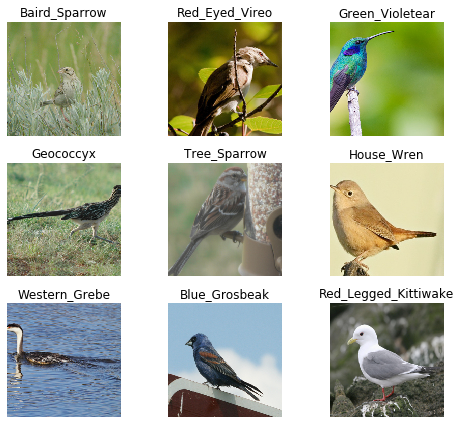

In [15]:
data.show_batch(rows=3, figsize=(7,6))

## Training: resnet34

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.062075,2.107412,0.545609,00:33
1,2.194752,1.412149,0.391599,00:31
2,1.493684,1.163035,0.323292,00:31
3,1.169555,1.111114,0.303352,00:31


In [18]:
learn.save('stage-1')

## Results

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()

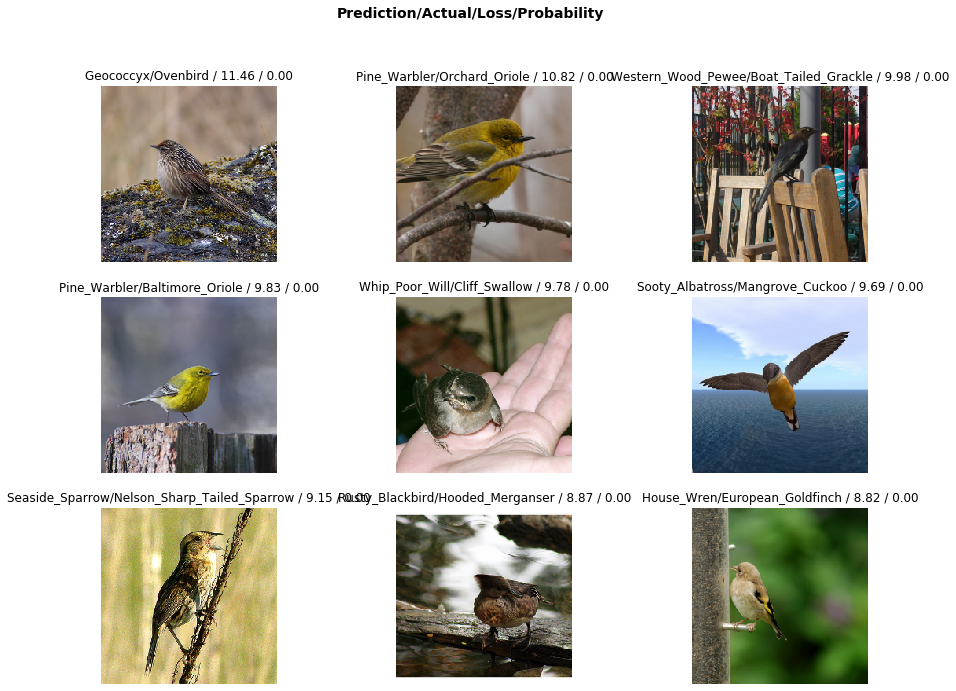

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

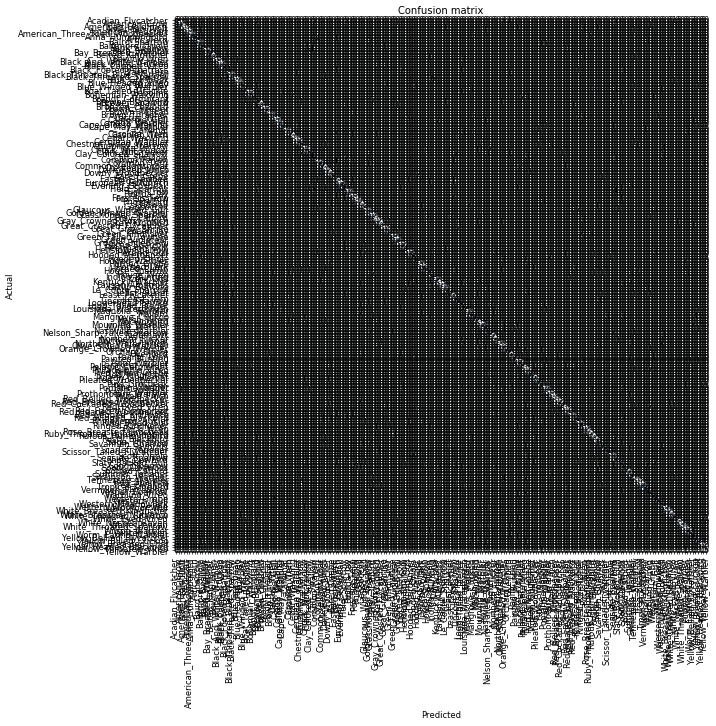

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [25]:
interp.most_confused(min_val=2)

[('Northern_Waterthrush', 'Louisiana_Waterthrush', 7),
 ('Blue_Grosbeak', 'Indigo_Bunting', 6),
 ('Olive_Sided_Flycatcher', 'Western_Wood_Pewee', 6),
 ('Slaty_Backed_Gull', 'California_Gull', 6),
 ('Western_Gull', 'California_Gull', 6),
 ('Caspian_Tern', 'Elegant_Tern', 5),
 ('Fish_Crow', 'Common_Raven', 5),
 ('Warbling_Vireo', 'Philadelphia_Vireo', 5),
 ('Artic_Tern', 'Common_Tern', 4),
 ('Barn_Swallow', 'Cliff_Swallow', 4),
 ('Chuck_Will_Widow', 'Whip_Poor_Will', 4),
 ('Common_Tern', 'Artic_Tern', 4),
 ('Common_Tern', 'Elegant_Tern', 4),
 ('Fish_Crow', 'Shiny_Cowbird', 4),
 ('Hooded_Oriole', 'Baltimore_Oriole', 4),
 ('Mangrove_Cuckoo', 'Yellow_Billed_Cuckoo', 4),
 ('Tennessee_Warbler', 'Orange_Crowned_Warbler', 4),
 ('Tree_Sparrow', 'Chipping_Sparrow', 4),
 ('Yellow_Billed_Cuckoo', 'Black_Billed_Cuckoo', 4),
 ('Acadian_Flycatcher', 'Yellow_Bellied_Flycatcher', 3),
 ('American_Crow', 'Fish_Crow', 3),
 ('American_Crow', 'Shiny_Cowbird', 3),
 ('Baird_Sparrow', 'Grasshopper_Sparrow', 3),

In [26]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


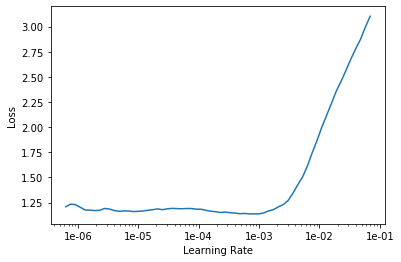

In [27]:
learn.recorder.plot()

In [28]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.155005,1.079491,0.303352,00:41
1,1.054898,0.979114,0.280017,00:41
2,0.938457,0.947771,0.272804,00:41
3,0.902989,0.947258,0.270259,00:41
